### Problem Statement:
#### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [610]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math

In [611]:
train_data='D:/My Personal Documents/Learnings/Data Science/Data Sets/Big Mart Sale/Train.csv'
test_data='D:/My Personal Documents/Learnings/Data Science/Data Sets/Big Mart Sale/Test.csv'
train=pd.read_csv(train_data)
test=pd.read_csv(test_data)

In [612]:
print(train.shape)
print(test.shape)

(8523, 13)
(5681, 11)


In [613]:
train['source']='train'
test['source']='test'
train = pd.concat([train, test],ignore_index=True)
#print (train.shape, test.shape, data.shape)

C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


In [614]:
train.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Sale,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,15.0,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,10.0,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,15.0,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store,5.0,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,19.0,train


In [615]:
train['Store_Age']=2013-train.Outlet_Establishment_Year
train_cat=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
train_num=['Item_Weight','Item_MRP','Item_Visibility','Store_Age']
ColID=['Item_Identifier','Outlet_Identifier']
targetCol=['Item_Outlet_Sales']

In [616]:
train['Item_Fat_Content']= train.Item_Fat_Content.map({'LF':'Low Fat','Low Fat':'Low Fat','Regular':'Regular','low fat':'Low Fat','reg':'Regular'})

In [617]:
missing_weight = train[train['Item_Weight'].isnull()]
# determine mean age based on Sex and Pclass
mean_weight = train.groupby(['Item_Identifier'])['Item_Weight'].max()

def remove_na_weight(df):
    if pd.isnull(df['Item_Weight']):
        return mean_weight[df['Item_Identifier']]
    else:
        return df['Item_Weight']

train['Item_Weight'] =train.apply(remove_na_weight, axis=1)
train['Item_Weight']=train.Item_Weight.fillna(train.Item_Weight.mean())

In [618]:
table=pd.crosstab(train['Item_Fat_Content'],train['Item_Type'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('chi-squire statistics %.3f p_value %.3f' %(chi2,p))

chi-squire statistics 2582.342 p_value 0.000


In [619]:
table=pd.crosstab(train['Item_Fat_Content'],train['Outlet_Type'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('chi-squire statistics %.3f p_value %.3f' %(chi2,p))

chi-squire statistics 0.018 p_value 0.999


In [620]:
table=pd.crosstab(train['Item_Fat_Content'],train['Outlet_Size'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('chi-squire statistics %.3f p_value %.3f' %(chi2,p))

chi-squire statistics 0.000 p_value 1.000


In [621]:
table=pd.crosstab(train['Item_Fat_Content'],train['Outlet_Location_Type'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('chi-squire statistics %.3f p_value %.3f' %(chi2,p))

chi-squire statistics 0.027 p_value 0.987


In [622]:
table=pd.crosstab(train['Item_Fat_Content'],train['Outlet_Type'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('chi-squire statistics %.3f p_value %.3f' %(chi2,p))

chi-squire statistics 0.018 p_value 0.999


In [623]:
table=pd.crosstab(train['Outlet_Type'],train['Outlet_Size'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('chi-squire statistics %.3f p_value %.3f' %(chi2,p))

chi-squire statistics 8964.848 p_value 0.000


In [624]:
table=pd.crosstab(train['Outlet_Type'],train['Outlet_Location_Type'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('chi-squire statistics %.3f p_value %.3f' %(chi2,p))

chi-squire statistics 7875.969 p_value 0.000


In [625]:
table=pd.crosstab(train['Outlet_Size'],train['Outlet_Location_Type'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('chi-squire statistics %.3f p_value %.3f' %(chi2,p))

chi-squire statistics 8010.198 p_value 0.000


In [626]:
table=pd.crosstab(train['Outlet_Type'],train['Item_Type'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('chi-squire statistics %.3f p_value %.3f' %(chi2,p))

chi-squire statistics 5.418 p_value 1.000


In [627]:
train[train_num].corr()

,Item_Weight,Item_MRP,Item_Visibility,Store_Age
Item_Weight,1.000000,0.035751,-0.015412,-0.000247
Item_MRP,0.035751,1.000000,-0.006351,-0.000141
Item_Visibility,-0.015412,-0.006351,1.000000,0.083678
Store_Age,-0.000247,-0.000141,0.083678,1.000000


In [628]:
#train.drop('Outlet_Location_Type',axis=1,inplace=True)
#train.drop('Outlet_Type',axis=1,inplace=True)
#train.drop('Outlet_Size',axis=1,inplace=True)
#train.drop('Item_Fat_Content',axis=1,inplace=True)
#train.drop('Item_Type',axis=1,inplace=True)

In [629]:
train=pd.get_dummies(train,columns=['Item_Fat_Content','Outlet_Type','Outlet_Location_Type','Outlet_Size','Item_Type'])

In [630]:
#train.drop('source',axis=1,inplace=True)
#train.drop('Item_Weight',axis=1,inplace=True)
#train.drop('store_age',axis=1,inplace=True)

In [631]:
train.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [632]:
train.drop('Sale',axis=1,inplace=True)

In [633]:
train['Item_Outlet_Sales']=np.abs(np.log(train['Item_Outlet_Sales']))
train['Item_MRP']=np.abs(np.log(train['Item_MRP']))
train['Item_Weight']=np.abs(np.log(train['Item_Weight']))
#train['Store_Age']=np.abs(np.log(train['Store_Age']))
train.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,source,Store_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,5.520697,8.225540,0.016047,2.230014,OUT049,train,14,1,0,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,3.876794,6.094524,0.019278,1.778336,OUT018,train,4,0,1,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,4.953133,7.648392,0.016760,2.862201,OUT049,train,14,1,0,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,5.204529,6.596300,0.000000,2.954910,OUT010,train,15,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,3.986414,6.902446,0.000000,2.189416,OUT013,train,26,1,0,...,0,0,0,1,0,0,0,0,0,0


In [634]:
#sb.pairplot(train,x_vars=['Item_MRP','Item_Visibility','store_age'],y_vars='Item_Outlet_Sales')
test=train[train.source=='test']
train=train[train.source=='train']
test.drop('source',axis=1,inplace=True)
train.drop('source',axis=1,inplace=True)

In [635]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection, metrics

In [636]:
predictors = [x for x in train.columns if x not in targetCol+ColID]
#predictors=['Outlet_Type_Grocery Store','Item_MRP','Outlet_Type_Supermarket Type3','Outlet_Type_Supermarket Type2','Outlet_Type_Supermarket Type1']
x_train, x_test, y_train, y_test = train_test_split(train[predictors],train[targetCol],random_state=20)

In [637]:
mod_lr=LinearRegression()
mod_lr.fit(x_train,y_train)
mod_lr.score(x_test,y_test)

0.7457498952690936

In [638]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mod_lr, x_test, y_test, cv=10)
np.mean(scores)

0.7442634984178189

In [639]:
from sklearn.linear_model import Lasso
## training the model
lassoReg = Lasso(alpha=0.0001, normalize=True)
lassoReg.fit(x_train,y_train)
#pred=lassoReg.predict(x_test)
lassoReg.score(x_test,y_test)

0.7471607004335995

In [640]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lassoReg, x_test, y_test, cv=10)
np.mean(scores)

0.7457205431284659

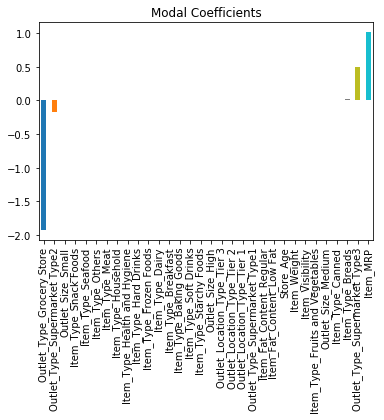

In [641]:
predictors = x_train.columns
coef = pd.Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [642]:
from sklearn.linear_model import Ridge
## training the model
ridgeReg = Ridge(alpha=0.0001, normalize=True)
ridgeReg.fit(x_train,y_train)
pred=ridgeReg.predict(x_test)
ridgeReg.score(x_train,y_train)

0.7400544058231181

In [643]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ridgeReg, x_test, y_test, cv=10)
np.mean(scores)

0.7442688652255434

In [644]:
test_pred.shape

(5681, 1)

In [645]:
test_pred=ridgeReg.predict(test[predictors])
test_pred=pd.DataFrame(np.exp(test_pred))
test_pred.to_csv("Result.csv")

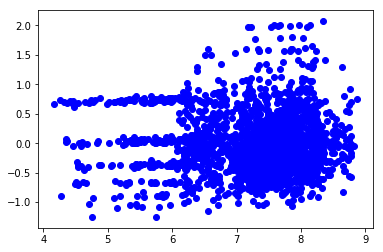

In [646]:
x_plot = plt.scatter(pred, (pred - y_test), c='b')